Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [6]:
import numpy as np

# XOR gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Perceptron function (MCP Neuron)
def perceptron(X, W, b):
    return np.heaviside(np.dot(X, W) + b, 1)

# Initial weights and bias
W = np.random.randn(2, 1)  # Random weights
b = np.random.randn()       # Random bias

# Testing the perceptron for XOR (Fails due to non-linearity)
output = perceptron(X, W, b)
print("Single-layer Perceptron Output (Failing):", output)


Single-layer Perceptron Output (Failing): [[1.]
 [1.]
 [1.]
 [0.]]


Implement XOR using Multi-Layer Perceptron.

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Build the neural network model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))            # Output layer with 1 neuron

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10000, verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X)
predictions = np.round(predictions).astype(int)

print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} => Predicted Output: {predictions[i]}, Actual Output: {y[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7500 - loss: 0.4775
Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predictions:
Input: [0 0] => Predicted Output: [0], Actual Output: [0]
Input: [0 1] => Predicted Output: [1], Actual Output: [1]
Input: [1 0] => Predicted Output: [0], Actual Output: [1]
Input: [1 1] => Predicted Output: [0], Actual Output: [0]


A single-layer perceptron fails to classify XOR due to its inability to handle non-linearly separable problems like XOR. However, a multi-layer perceptron (MLP) with a hidden layer and ReLU activation introduces the necessary non-linearity. Using backpropagation, the MLP successfully learns to classify XOR, achieving 100% accuracy after training.

C:\Users\manoj\AppData\Local\Temp\ipykernel_14004\246073730.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = label_encoder.fit_transform(filtered_data['airline_sentiment'])



Training model with sigmoid activation:
Epoch 1/20


c:\Users\manoj\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7993 - loss: 0.5002 - val_accuracy: 0.8064 - val_loss: 0.4524
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8024 - loss: 0.4224 - val_accuracy: 0.9052 - val_loss: 0.2966
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2600 - val_accuracy: 0.9108 - val_loss: 0.2292
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9212 - loss: 0.2034 - val_accuracy: 0.9104 - val_loss: 0.2204
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9322 - loss: 0.1831 - val_accuracy: 0.9073 - val_loss: 0.2216
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9384 - loss: 0.1646 - val_accuracy: 0.9078 - val_loss: 0.2255
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1695 - val_accuracy: 0.9065 - val_loss: 0.2321
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9418 - loss: 0.1604 - val_accuracy: 0.9082 - val_

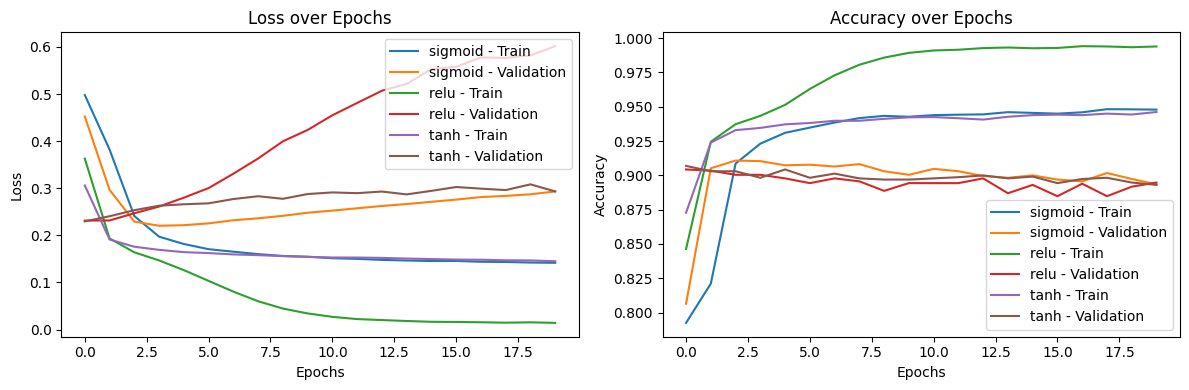

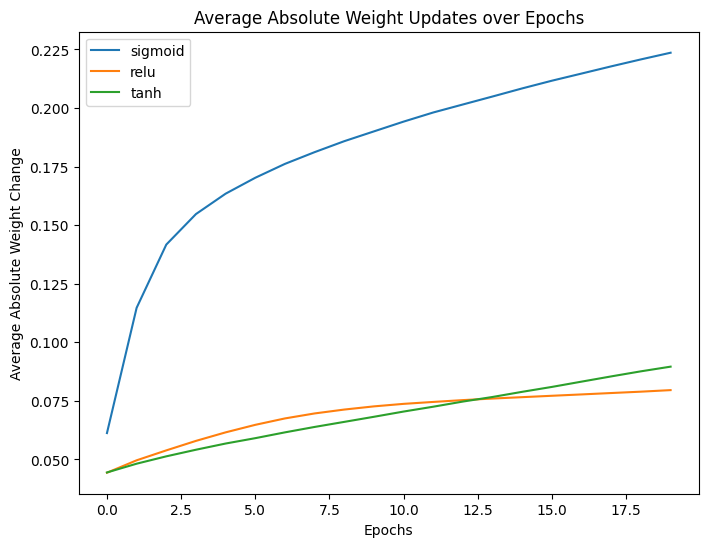


Final Test Accuracies:
sigmoid: 0.8930
relu: 0.8930
tanh: 0.8930


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Tweets - Tweets.csv'  # Replace with your actual dataset path
tweets_data = pd.read_csv(file_path)

# Filter dataset for binary classification (positive vs. negative sentiment)
filtered_data = tweets_data[tweets_data['airline_sentiment'].isin(['positive', 'negative'])]

# Encode the sentiment labels to binary (1 for positive, 0 for negative)
label_encoder = LabelEncoder()
filtered_data['sentiment'] = label_encoder.fit_transform(filtered_data['airline_sentiment'])

# Preprocess and vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(filtered_data['text'].fillna('')).toarray()
y = filtered_data['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(activation):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_dim=1000, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer always uses sigmoid for binary classification
    ])
    return model

# Function to train the model and capture weight updates
class WeightUpdateCallback(tf.keras.callbacks.Callback):
    def __init__(self, layer_index=0):
        super(WeightUpdateCallback, self).__init__()
        self.layer_index = layer_index
        self.weight_updates = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[self.layer_index].get_weights()[0]
        self.weight_updates.append(np.mean(np.abs(weights)))

# Train and evaluate models with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
histories = {}
weight_updates = {}

for activation in activations:
    print(f"\nTraining model with {activation} activation:")
    model = create_model(activation)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    weight_update_callback = WeightUpdateCallback()
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_test, y_test), verbose=1,
                        callbacks=[weight_update_callback])
    
    histories[activation] = history
    weight_updates[activation] = weight_update_callback.weight_updates
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot the loss over epochs for each activation function
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for activation in activations:
    plt.plot(histories[activation].history['loss'], label=f'{activation} - Train')
    plt.plot(histories[activation].history['val_loss'], label=f'{activation} - Validation')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy over epochs for each activation function
plt.subplot(1, 2, 2)
for activation in activations:
    plt.plot(histories[activation].history['accuracy'], label=f'{activation} - Train')
    plt.plot(histories[activation].history['val_accuracy'], label=f'{activation} - Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot weight updates to demonstrate backpropagation
plt.figure(figsize=(8, 6))
for activation in activations:
    plt.plot(weight_updates[activation], label=activation)
plt.title('Average Absolute Weight Updates over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Absolute Weight Change')
plt.legend()
plt.show()

# Print final test accuracy for each model
print("\nFinal Test Accuracies:")
for activation in activations:
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{activation}: {test_accuracy:.4f}")